# Data Understanding

In [1]:
import pandas as pd
data = pd.read_csv('/content/SBAnational.csv')
data.head()

/tmp/ipython-input-1-387873190.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

# Data Cleaning and Manipulation

## Duplicate Checking

In [3]:
len(data.drop_duplicates()) / len(data)

1.0

## Choosing Columns and NaN Checking

In [4]:
df = pd.concat([data.iloc[:, 10:19], data.iloc[:, 21:25]], axis=1)

In [5]:
df.head()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr
0,84,4,2.0,0,0,1,0,N,Y,"$60,000.00",$0.00,P I F,$0.00
1,60,2,2.0,0,0,1,0,N,Y,"$40,000.00",$0.00,P I F,$0.00
2,180,7,1.0,0,0,1,0,N,N,"$287,000.00",$0.00,P I F,$0.00
3,60,2,1.0,0,0,1,0,N,Y,"$35,000.00",$0.00,P I F,$0.00
4,240,14,1.0,7,7,1,0,N,N,"$229,000.00",$0.00,P I F,$0.00


In [6]:
df.isna().sum()

,0
Term,0
NoEmp,0
NewExist,136
CreateJob,0
RetainedJob,0
FranchiseCode,0
UrbanRural,0
RevLineCr,4528
LowDoc,2582
DisbursementGross,0


## Missing Values Handling

### `MIS Status`

In [7]:
df['MIS_Status'].value_counts()

,count
MIS_Status,
P I F,739609
CHGOFF,157558


In [8]:
mis_data = data.iloc[:,23:25]

In [9]:
NaN_mis = mis_data[mis_data['MIS_Status'].isna()]

In [10]:
NaN_mis.isna().sum()

,0
MIS_Status,1997
ChgOffPrinGr,0


In [11]:
df.loc[df['MIS_Status'].isna() & df['ChgOffPrinGr'] == '$0.00', 'MIS_Status'] = 'P I F'
df.loc[df['MIS_Status'].isna(), 'MIS_Status'] = 'CHGOFF'

### `New Exist`

In [12]:
df.isna().sum()

,0
Term,0
NoEmp,0
NewExist,136
CreateJob,0
RetainedJob,0
FranchiseCode,0
UrbanRural,0
RevLineCr,4528
LowDoc,2582
DisbursementGross,0


In [13]:
col_name = list(df.columns)

In [14]:
for col in col_name:
  print(df[col].value_counts())

Term
84     230162
60      89945
240     85982
120     77654
300     44727
        ...  
434         1
402         1
423         1
440         1
429         1
Name: count, Length: 412, dtype: int64
NoEmp
1       154254
2       138297
3        90674
4        73644
5        60319
         ...  
858          1
9945         1
1542         1
1920         1
3713         1
Name: count, Length: 599, dtype: int64
NewExist
1.0    644869
2.0    253125
0.0      1034
Name: count, dtype: int64
CreateJob
0       629248
1        63174
2        57831
3        28806
4        20511
         ...  
2515         1
162          1
182          1
1016         1
860          1
Name: count, Length: 246, dtype: int64
RetainedJob
0       440403
1        88790
2        76851
3        49963
4        39666
         ...  
1111         1
243          1
199          1
900          1
198          1
Name: count, Length: 358, dtype: int64
FranchiseCode
1        638554
0        208835
78760      3373
68020      1921
50564  

In [15]:
df[df['NewExist'] == 0]

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr
142,84,4,0.0,0,0,1,0,0,N,"$100,000.00",$0.00,P I F,$0.00
170,180,2,0.0,0,0,1,0,0,N,"$70,000.00",$0.00,P I F,$0.00
185,36,1,0.0,0,0,1,0,0,N,"$10,000.00",$0.00,P I F,$0.00
211,12,10,0.0,0,0,1,0,0,N,"$100,000.00",$0.00,P I F,$0.00
223,18,3,0.0,0,0,1,0,0,N,"$20,000.00",$0.00,P I F,$0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895872,12,7,0.0,0,0,1,0,Y,N,"$250,000.00",$0.00,P I F,$0.00
895976,12,2,0.0,0,0,1,0,N,N,"$50,000.00",$0.00,P I F,$0.00
896382,60,3,0.0,0,0,1,0,N,Y,"$18,700.00",$0.00,P I F,$0.00
896633,60,1,0.0,0,0,1,0,N,Y,"$60,000.00",$0.00,P I F,$0.00


In [16]:
df.loc[(df['NewExist'] == 0) & (df['RetainedJob'] != 0), 'NewExist'] = 1
df.loc[(df['NewExist'].isna()) & (df['RetainedJob'] != 0), 'NewExist'] = 1
df.loc[df['NewExist'] != 1, 'NewExist'] = 2
df.loc[df['NewExist'] == 1, 'NewExist'] = 0
df.loc[df['NewExist'] == 2, 'NewExist'] = 1

In [17]:
df['NewExist'].value_counts()

,count
NewExist,
0.0,645139
1.0,254025


### Revline Cr

In [18]:
df.loc[df['RevLineCr'] == '1', 'RevLineCr'] = 1
df.loc[df['RevLineCr'] == '2', 'RevLineCr'] = 1
df.loc[df['RevLineCr'] == '3', 'RevLineCr'] = 1
df.loc[df['RevLineCr'] == '4', 'RevLineCr'] = 1
df.loc[df['RevLineCr'] == '5', 'RevLineCr'] = 1
df.loc[df['RevLineCr'] == '7', 'RevLineCr'] = 1
df.loc[df['RevLineCr'] == 'Y', 'RevLineCr'] = 1
df.loc[df['RevLineCr'] == 'T', 'RevLineCr'] = 1
df.loc[df['RevLineCr'] != 1, 'RevLineCr'] = 0
df['RevLineCr'] = df['RevLineCr'].astype(int)

In [19]:
df['RevLineCr'].value_counts()

,count
RevLineCr,
0,682450
1,216714


### Low Doc

In [20]:
df.loc[(df['LowDoc'] == 'Y') | (df['LowDoc'] == '1'), 'LowDoc'] = 1
df.loc[df['LowDoc'] != 1, 'LowDoc'] = 0
df['LowDoc'] = df['LowDoc'].astype(int)

In [21]:
df['LowDoc'].value_counts()

,count
LowDoc,
0,788828
1,110336


## One Hot Encoding

### Urban Rural

In [22]:
df.loc[df['UrbanRural'] == 1, 'Urban'] = 1
df.loc[df['UrbanRural'] != 1, 'Urban'] = 0
df.loc[df['UrbanRural'] == 2, 'Rural'] = 1
df.loc[df['UrbanRural'] != 2, 'Rural'] = 0

## Label Encoding

### MIS Status

In [23]:
df.loc[df['MIS_Status'] == 'P I F', 'MIS_Status'] = 0
df.loc[df['MIS_Status'] == 'CHGOFF', 'MIS_Status'] = 1
df['MIS_Status'] = df['MIS_Status'].astype(int)

### Franchise Code

In [24]:
df.loc[(df['FranchiseCode'] == 1) | (df['FranchiseCode'] == 0), 'FranchiseCode'] = 0
df.loc[df['FranchiseCode'] != 0, 'FranchiseCode'] = 1

In [25]:
df['FranchiseCode'].value_counts()

,count
FranchiseCode,
0,847389
1,51775


## Character Replacement

### Disbursement Gross and Balance Gross

In [26]:
df['DisbursementGross']=df['DisbursementGross'].str.replace(',','')
df['BalanceGross']=df['BalanceGross'].str.replace(',','')

In [27]:
df['DisbursementGross'] = df['DisbursementGross'].str.replace('$', '', regex=False).str.strip().astype(float)
df['BalanceGross'] = df['BalanceGross'].str.replace('$', '', regex=False).str.strip().astype(float)

In [28]:
df.isna().sum()

,0
Term,0
NoEmp,0
NewExist,0
CreateJob,0
RetainedJob,0
FranchiseCode,0
UrbanRural,0
RevLineCr,0
LowDoc,0
DisbursementGross,0


## Droping Unuse Columns

In [29]:
df = df.drop(['UrbanRural','ChgOffPrinGr','BalanceGross'], axis=1)

## Imbalance Handling

In [30]:
df['MIS_Status'].value_counts()

,count
MIS_Status,
0,739609
1,159555


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               899164 non-null  int64  
 1   NoEmp              899164 non-null  int64  
 2   NewExist           899164 non-null  float64
 3   CreateJob          899164 non-null  int64  
 4   RetainedJob        899164 non-null  int64  
 5   FranchiseCode      899164 non-null  int64  
 6   RevLineCr          899164 non-null  int64  
 7   LowDoc             899164 non-null  int64  
 8   DisbursementGross  899164 non-null  float64
 9   MIS_Status         899164 non-null  int64  
 10  Urban              899164 non-null  float64
 11  Rural              899164 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 82.3 MB


In [32]:
from imblearn import under_sampling

x = df.drop(['MIS_Status'],axis=1)
y = df['MIS_Status']

# Undersampling
x_under, y_under = under_sampling.RandomUnderSampler().fit_resample(x, y)

In [33]:
df_under = pd.concat([x_under, y_under], axis=1)
df_under['MIS_Status'].value_counts()

,count
MIS_Status,
0,159555
1,159555


# EDA

## Histogram, QQ Plot, and Boxplot

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [35]:
#Mengecek outlier
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [36]:
col_name = list(df_under.columns)

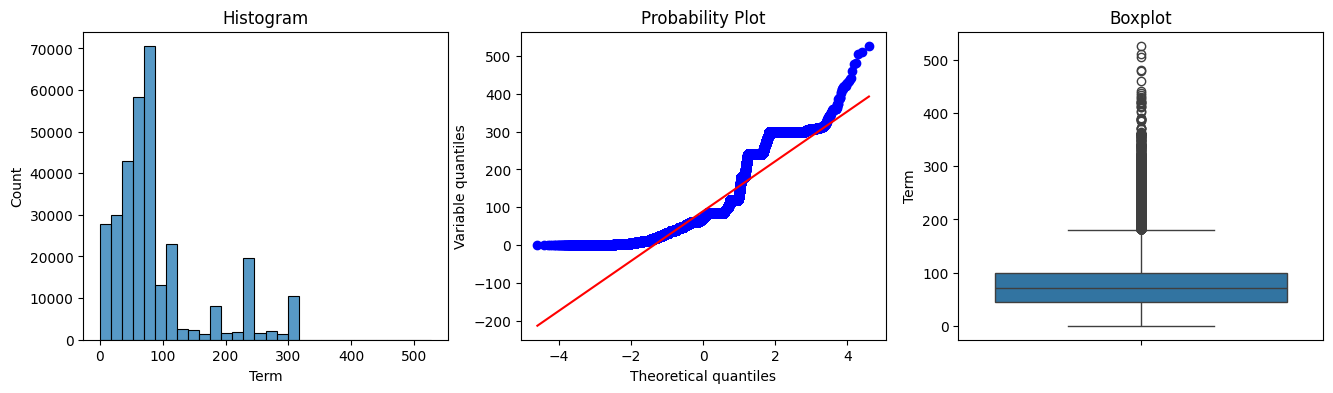

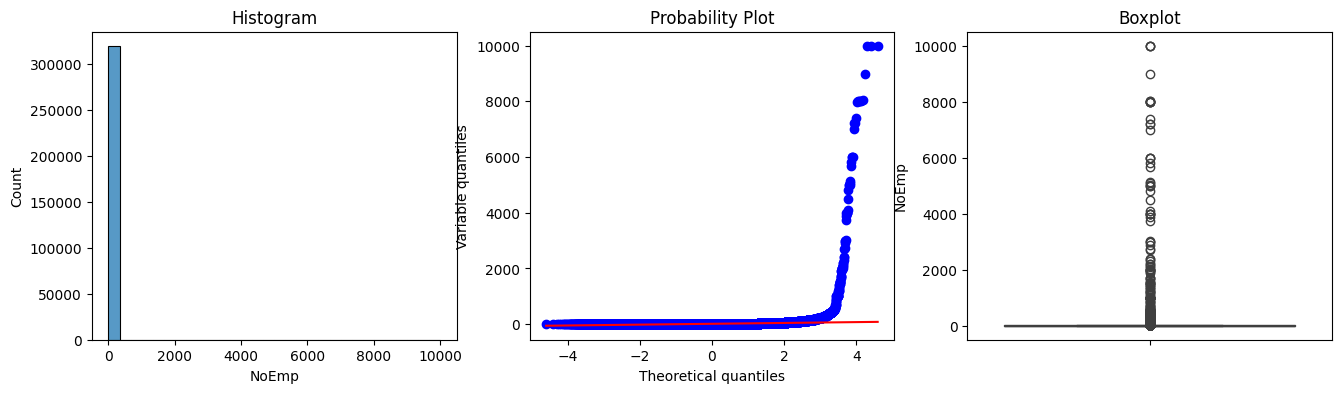

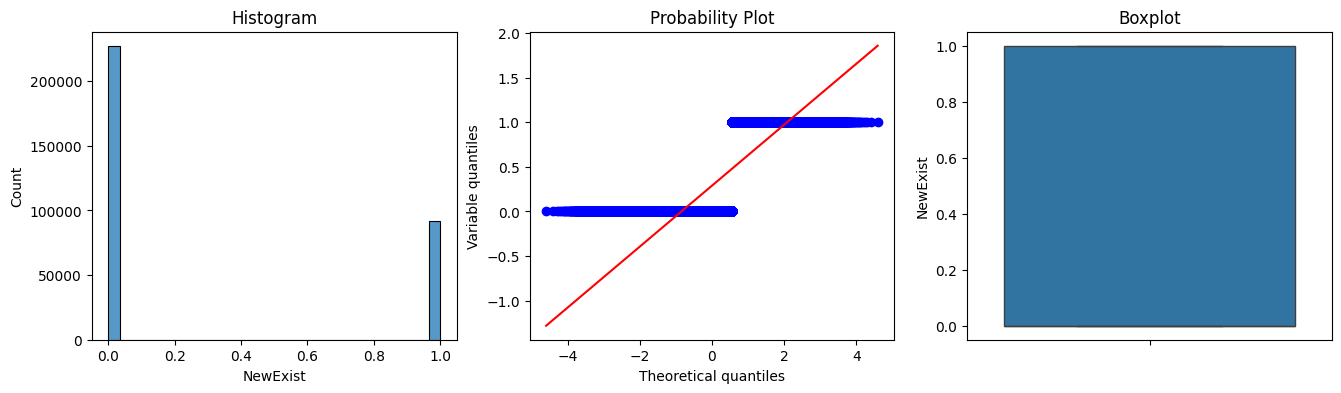

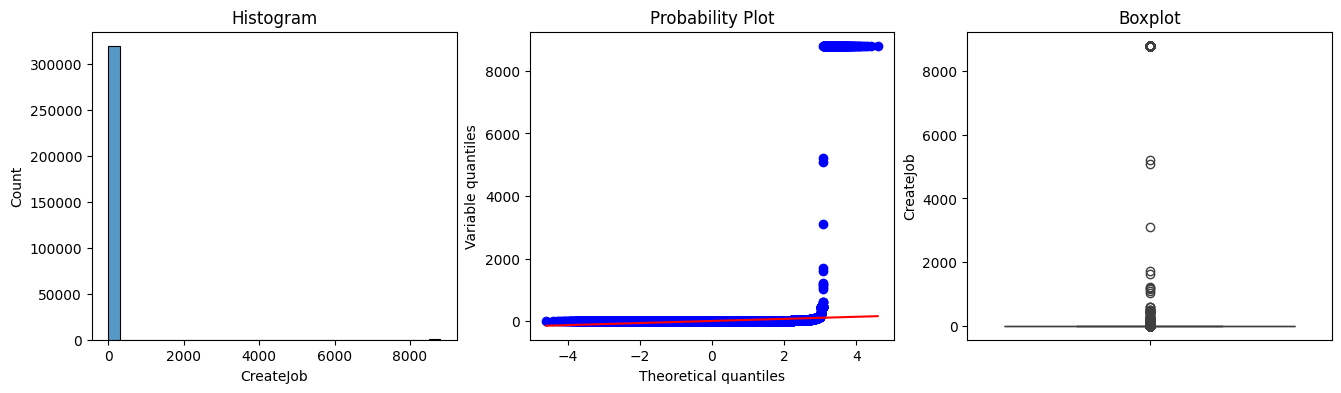

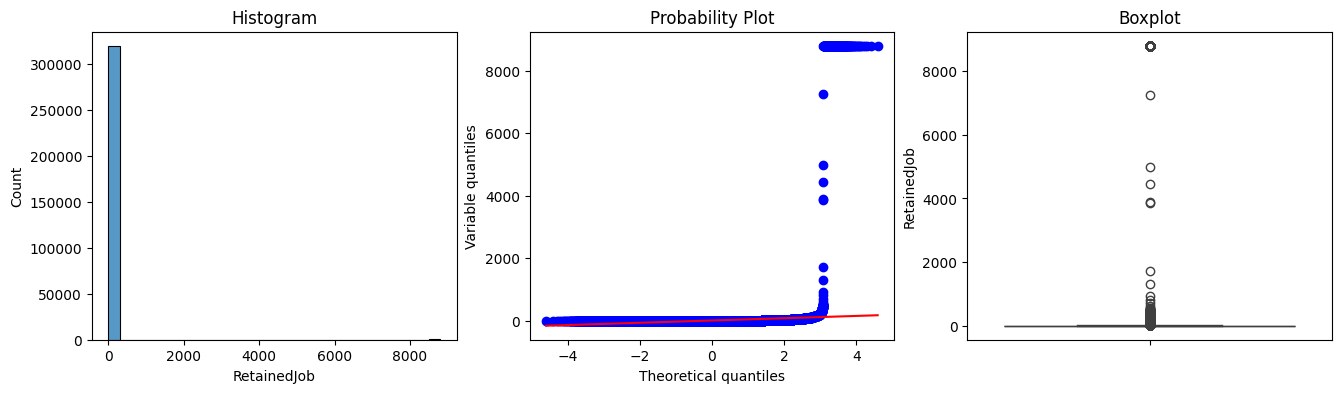

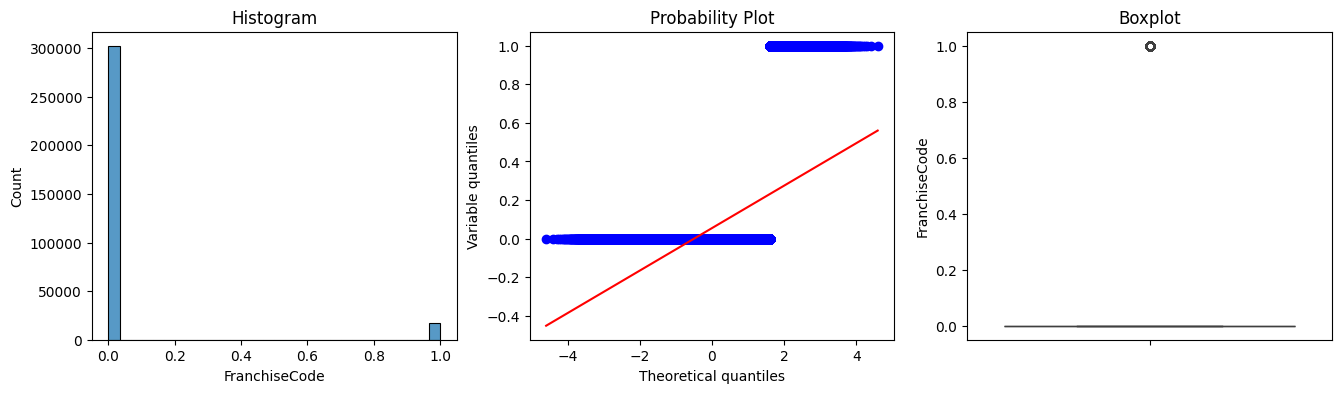

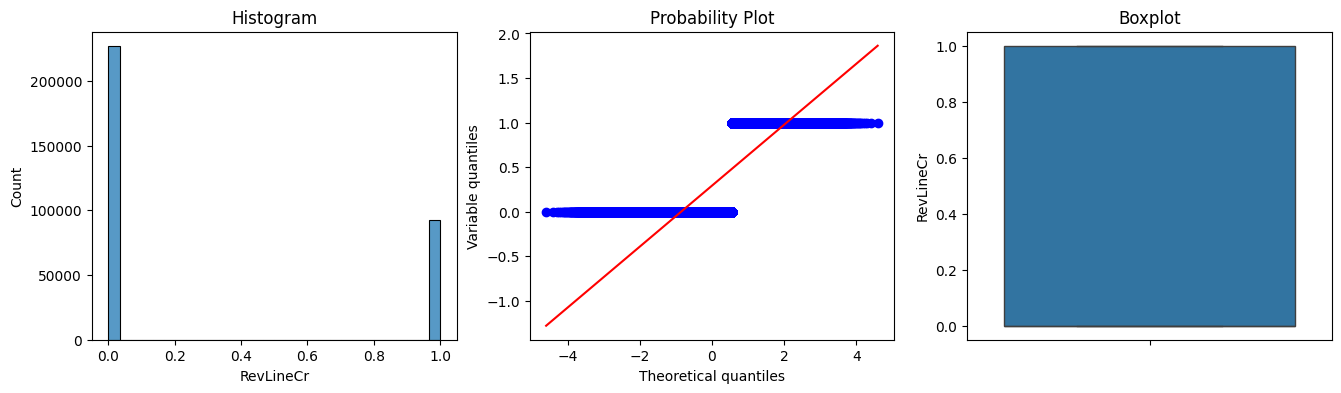

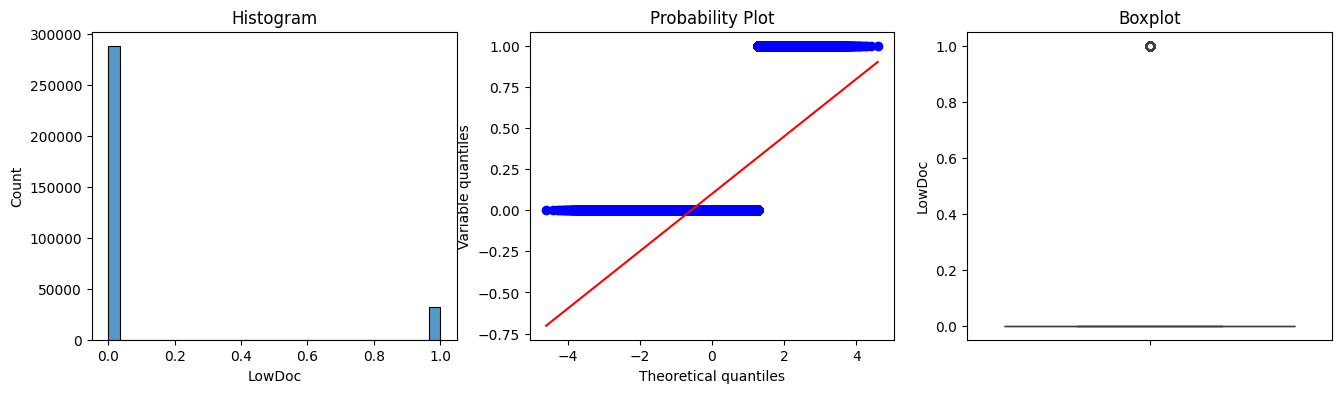

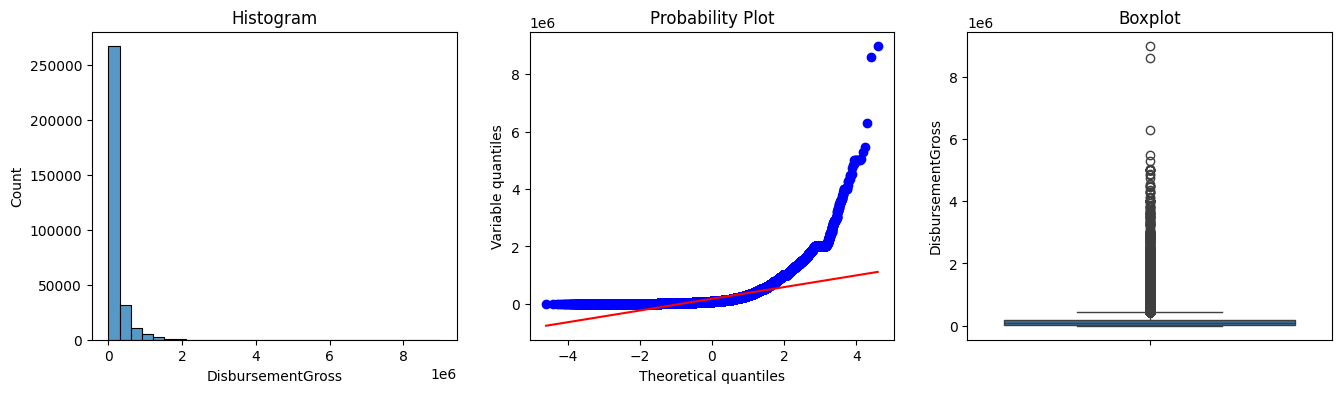

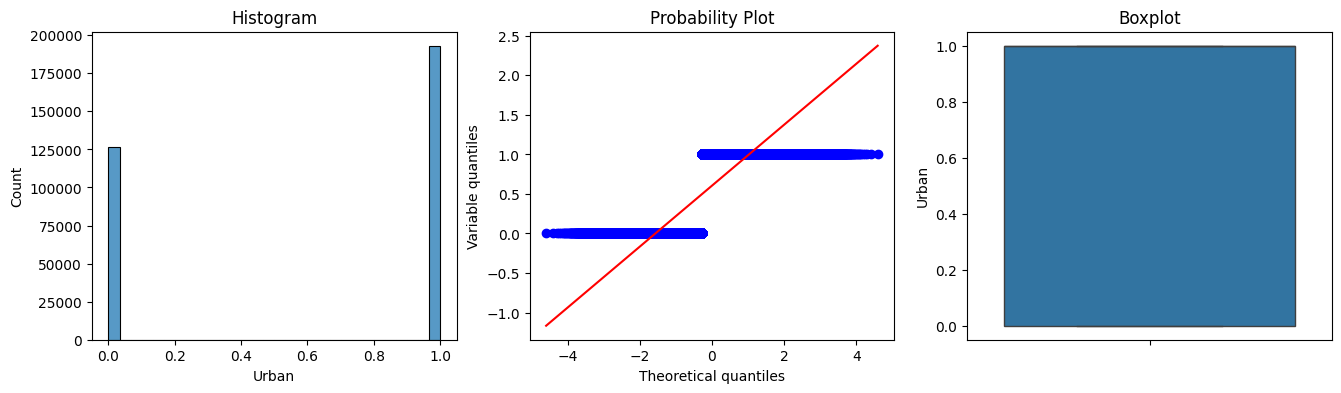

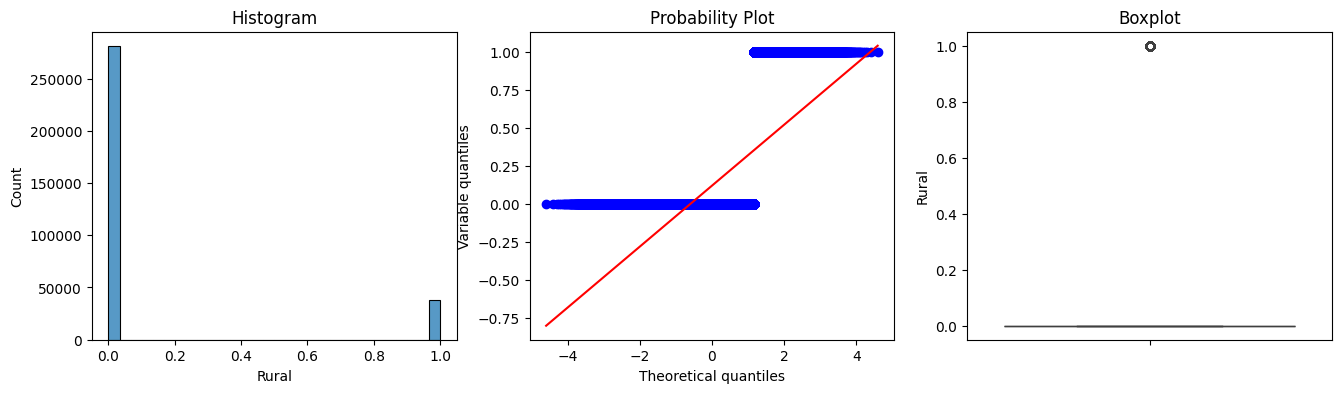

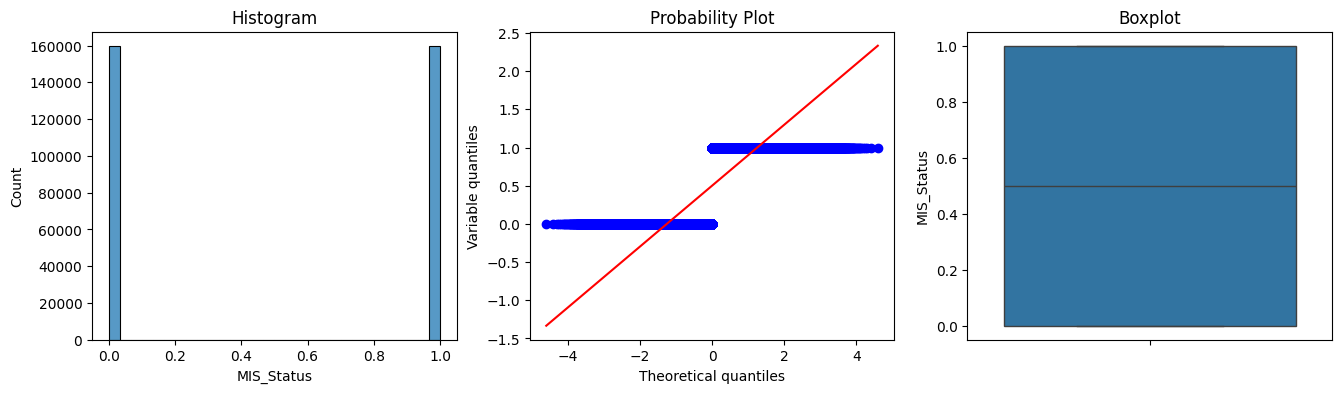

In [37]:
for col in col_name:
    check_plot(df_under, col)

## Heatmap Correlation

<Axes: >

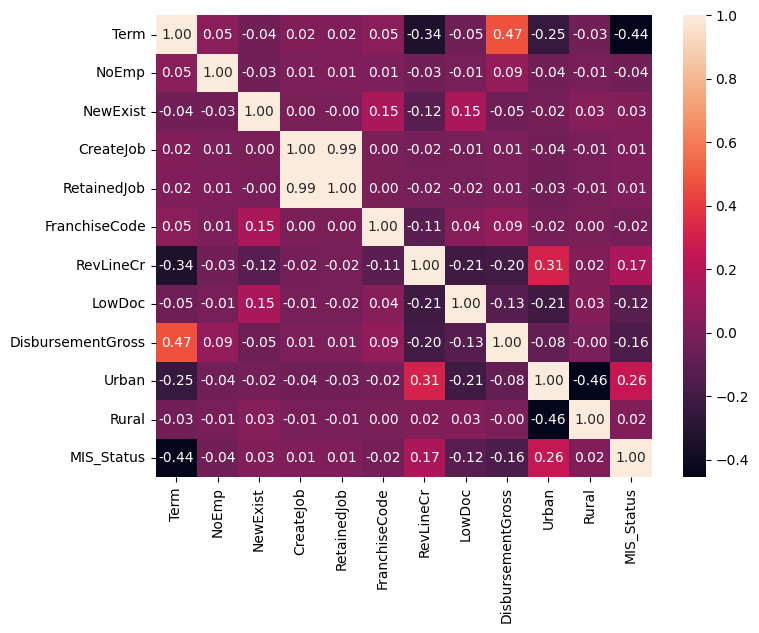

In [38]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = df_under[col_name].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [39]:
# Deleting column with high correlation value
df_under = df_under.drop('RetainedJob', axis=1)

# Feature Engineering

In [40]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_under, test_size = 0.3, random_state = 42)

In [41]:
df.columns


Index(['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'RevLineCr', 'LowDoc', 'DisbursementGross',
       'MIS_Status', 'Urban', 'Rural'],
      dtype='object')

## Standard Scaler

In [42]:
from sklearn.preprocessing import StandardScaler

# Kolom-kolom yang ingin dinormalisasi
columns_to_std = ['Term', 'NoEmp', 'CreateJob', 'DisbursementGross']

# Inisialisasi MinMaxScaler
std = StandardScaler()

In [43]:
train_df[['Term_std', 'NoEmp_std', 'CreateJob_std',  'DisbursementGross_std']] = std.fit_transform(train_df[columns_to_std])

In [44]:
std_col = ['Term_std', 'NoEmp_std', 'CreateJob_std', 'DisbursementGross_std']

## EDA After Standard Scaler

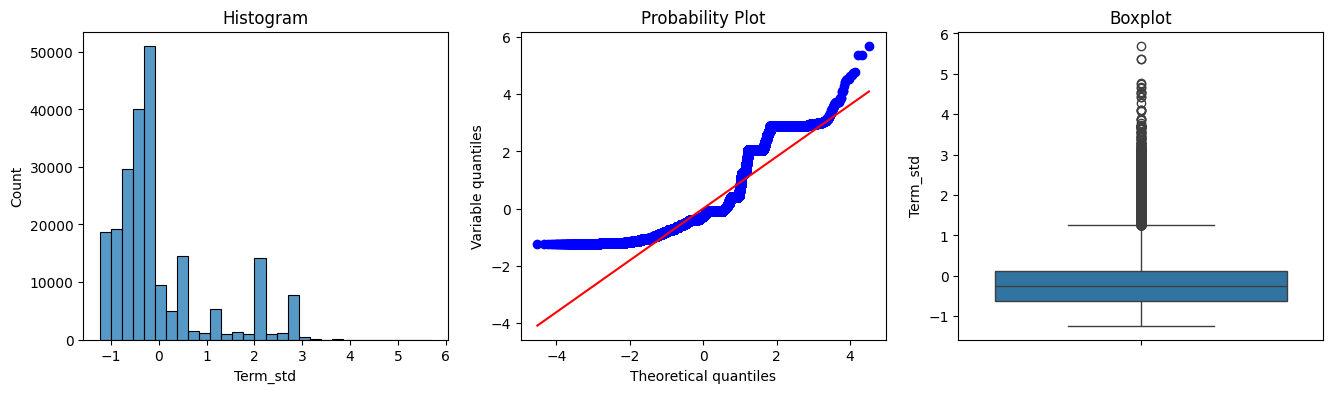

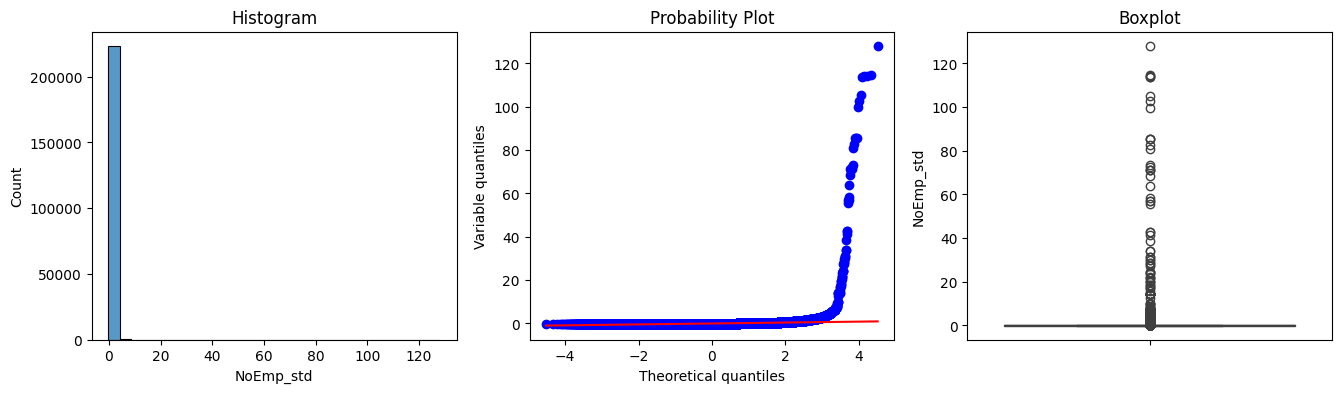

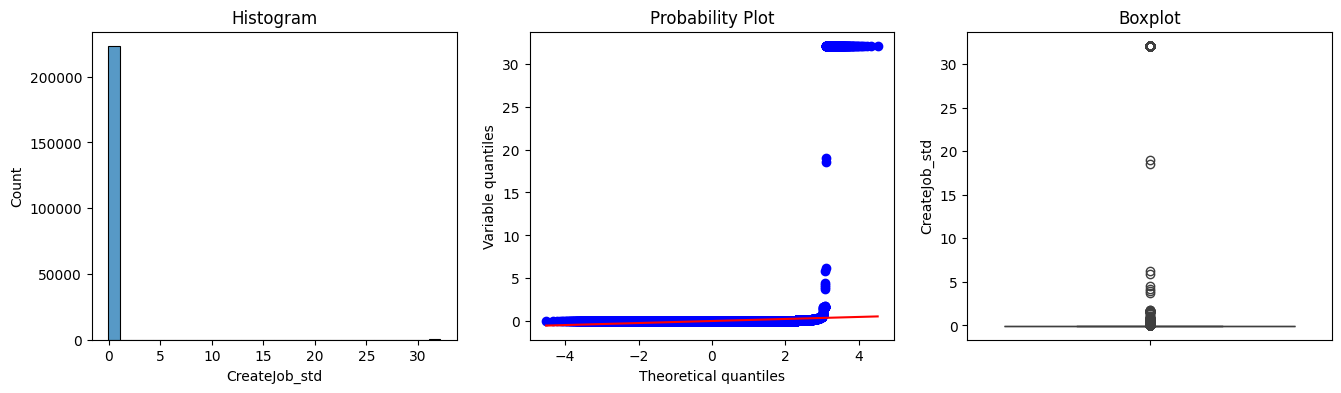

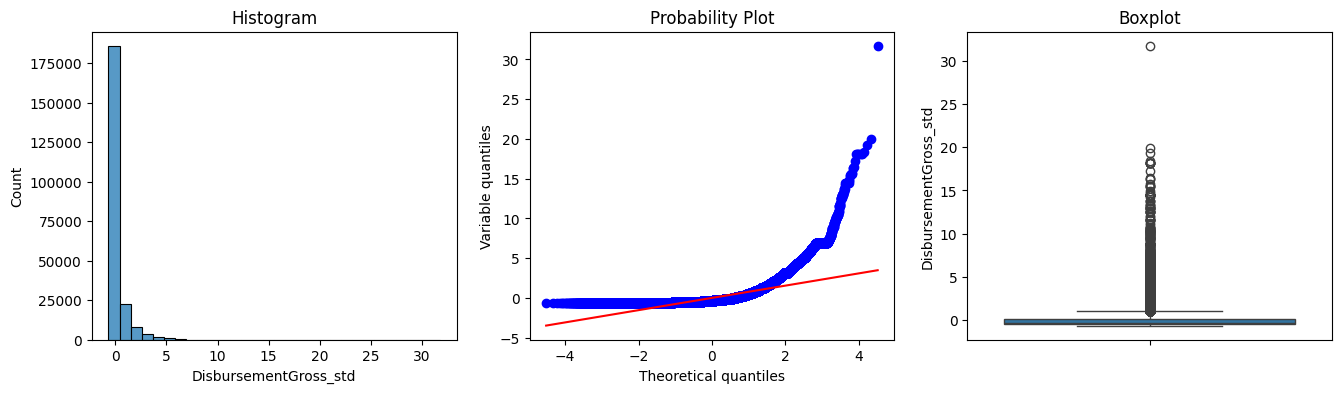

In [45]:
for col in std_col:
    check_plot(train_df, col)

# Modeling

In [46]:
train_df.head()

,Term,NoEmp,NewExist,CreateJob,FranchiseCode,RevLineCr,LowDoc,DisbursementGross,Urban,Rural,MIS_Status,Term_std,NoEmp_std,CreateJob_std,DisbursementGross_std
532173,55,1,1.0,1,0,1,0,37700.0,1.0,0.0,0,-0.477893,-0.126224,-0.034553,-0.514336
218255,77,2,1.0,0,0,1,0,7000.0,1.0,0.0,1,-0.176053,-0.111969,-0.038210,-0.629913
835234,108,14,1.0,0,0,0,1,75000.0,0.0,0.0,0,0.249266,0.059089,-0.038210,-0.373911
262148,12,5,0.0,0,0,0,0,25000.0,0.0,0.0,0,-1.067852,-0.069204,-0.038210,-0.562148
813904,17,3,0.0,0,0,0,1,70000.0,0.0,0.0,1,-0.999252,-0.097714,-0.038210,-0.392735


In [47]:
train_df.describe()

,Term,NoEmp,NewExist,CreateJob,FranchiseCode,RevLineCr,LowDoc,DisbursementGross,Urban,Rural,MIS_Status,Term_std,NoEmp_std,CreateJob_std,DisbursementGross_std
count,223377.000000,223377.000000,223377.000000,223377.000000,223377.000000,223377.000000,223377.000000,2.233770e+05,223377.000000,223377.000000,223377.000000,2.233770e+05,2.233770e+05,2.233770e+05,2.233770e+05
mean,89.831876,9.854788,0.289188,10.449827,0.054733,0.290612,0.098900,1.743195e+05,0.604803,0.119699,0.500387,-1.172803e-16,2.147116e-19,6.234589e-18,4.074749e-17
std,72.886583,70.151606,0.453387,273.488003,0.227458,0.454046,0.298528,2.656238e+05,0.488894,0.324610,0.500001,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.232491e+00,-1.404788e-01,-3.820954e-02,-6.562663e-01
25%,44.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000e+04,0.000000,0.000000,0.000000,-6.288123e-01,-1.119690e-01,-3.820954e-02,-5.245007e-01
50%,71.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+04,1.000000,0.000000,1.000000,-2.583729e-01,-8.345926e-02,-3.820954e-02,-3.550878e-01
75%,99.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.945110e+05,1.000000,0.000000,1.000000,1.257864e-01,-1.218490e-02,-3.455306e-02,7.601543e-02
max,505.000000,9000.000000,1.000000,8800.000000,1.000000,1.000000,1.000000,8.607858e+06,1.000000,1.000000,1.000000,5.696097e+00,1.281534e+02,3.213878e+01,3.175001e+01


In [48]:
df[df['NoEmp'] >= 1000]

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementGross,MIS_Status,Urban,Rural
1551,12,2000,0.0,0,0,0,1,0,400000.0,0,0.0,0.0
4829,12,7941,0.0,0,0,0,0,0,100000.0,0,0.0,0.0
7816,36,9992,1.0,0,0,0,0,1,55000.0,0,0.0,0.0
17791,120,2725,1.0,0,0,1,0,0,284000.0,0,0.0,0.0
44584,84,9999,1.0,0,0,0,0,0,50000.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
873991,60,1542,0.0,0,0,0,1,0,50000.0,0,0.0,0.0
874229,60,1920,0.0,0,0,0,0,1,80000.0,0,0.0,0.0
876050,84,1003,0.0,0,0,0,0,0,500000.0,0,0.0,0.0
877283,252,1300,0.0,0,0,0,0,0,308000.0,0,0.0,0.0


In [49]:
test_df[['Term_std', 'NoEmp_std', 'CreateJob_std',  'DisbursementGross_std']] = std.transform(test_df[columns_to_std])

In [50]:
x_train = train_df.drop(['Term', 'NoEmp', 'CreateJob',  'DisbursementGross', 'MIS_Status'], axis=1)
y_train = train_df['MIS_Status']

In [51]:
x_test = test_df.drop(['Term', 'NoEmp', 'CreateJob',  'DisbursementGross', 'MIS_Status'], axis=1)
y_test = test_df['MIS_Status']

## Decision Tree

### Prediction Without Hyperparameter Tuning

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1234)
model = dt.fit(x_train, y_train)

In [53]:
y_pred_dt = dt.predict(x_test)
test_df['Predict MIS Status DT'] = y_pred_dt

In [54]:
test_df.head()

,Term,NoEmp,NewExist,CreateJob,FranchiseCode,RevLineCr,LowDoc,DisbursementGross,Urban,Rural,MIS_Status,Term_std,NoEmp_std,CreateJob_std,DisbursementGross_std,Predict MIS Status DT
626951,84,1,0.0,0,0,1,0,124858.0,1.0,0.0,0,-0.080013,-0.126224,-0.038210,-0.186209,0
189182,165,2,0.0,0,0,0,0,210000.0,1.0,0.0,1,1.031305,-0.111969,-0.038210,0.134327,1
871652,240,14,0.0,4,0,0,0,83000.0,0.0,0.0,0,2.060303,0.059089,-0.023584,-0.343794,0
353588,48,14,0.0,0,0,0,0,180000.0,0.0,0.0,0,-0.573932,0.059089,-0.038210,0.021385,0
481671,126,6,0.0,0,0,0,0,39000.0,0.0,0.0,0,0.496226,-0.054950,-0.038210,-0.509442,1


In [55]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
print('Akurasi',accuracy_score(y_test, y_pred_dt))

Akurasi 0.8684675085916037


In [56]:
print('Recall',recall_score(y_test, y_pred_dt))

Recall 0.8593553788195898


In [57]:
# Count False Negatives (pred = 0, actual = 1)
tn = np.sum((y_pred_dt == 0) & (y_test == 1))*100/sum(y_test == 1)

# Count False Positives (pred = 1, actual = 0)
fp = np.sum((y_pred_dt == 1) & (y_test == 0))*100/sum(y_test == 0)

print(f"False Negatives : {tn:.02f}%")
print(f"False Positives: {fp:.02f}%")


False Negatives : 14.06%
False Positives: 12.25%


### Prediction with Hyperparameter Tuning

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=1234)

In [59]:
# using random search CV

from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

random_search = RandomizedSearchCV(dt_clf,
                           params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")
random_search.fit(x_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1234),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100]},
                   scoring='recall', verbose=1)

In [60]:
# classification report
from sklearn.metrics import classification_report
y_pred = random_search.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     47953
           1       0.89      0.90      0.90     47780

    accuracy                           0.90     95733
   macro avg       0.90      0.90      0.90     95733
weighted avg       0.90      0.90      0.90     95733



In [88]:
# checking the model to data train
y_check = random_search.best_estimator_.predict(x_train)
print(classification_report(y_train, y_check))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90    111602
           1       0.89      0.91      0.90    111775

    accuracy                           0.90    223377
   macro avg       0.90      0.90      0.90    223377
weighted avg       0.90      0.90      0.90    223377



Based on the classification report of `y_check` and `y_pred`, the model is not overfitting.

## Logistic Regression

### Without Hyperparameter Tuning

In [61]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [62]:
y_pred_reg = logreg.predict(x_test)

In [63]:
print('Akurasi',accuracy_score(y_test, y_pred_reg))

Akurasi 0.7586307751767938


In [64]:
print('Recall',recall_score(y_test, y_pred_reg))

Recall 0.8339263290079532


In [65]:
# Count False Negatives (pred = 0, actual = 1)
tn = np.sum((y_pred_reg == 0) & (y_test == 1))*100/sum(y_test == 1)

# Count False Positives (pred = 1, actual = 0)
fp = np.sum((y_pred_reg == 1) & (y_test == 0))*100/sum(y_test == 0)

print(f"False Negatives : {tn:.02f}%")
print(f"False Positives: {fp:.02f}%")

False Negatives : 16.61%
False Positives: 31.64%


In [66]:
test_df['Predict MIS Status Reg'] = y_pred_reg
compare = test_df[['MIS_Status','Predict MIS Status DT', 'Predict MIS Status Reg']]

In [67]:
compare[(compare['MIS_Status']== 0) & (compare['Predict MIS Status Reg']==1)]

,MIS_Status,Predict MIS Status DT,Predict MIS Status Reg
353588,0,0,1
785912,0,0,1
470765,0,0,1
335054,0,0,1
694364,0,0,1
...,...,...,...
675333,0,1,1
692143,0,0,1
640896,0,0,1
349469,0,0,1


In [68]:
compare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95733 entries, 626951 to 83506
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   MIS_Status              95733 non-null  int64
 1   Predict MIS Status DT   95733 non-null  int64
 2   Predict MIS Status Reg  95733 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


### With Hyperparameter Tuning

In [69]:
logModel = LogisticRegression()

In [70]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [71]:
logit = RandomizedSearchCV(logModel, param_grid, cv = 3, verbose=True, n_jobs=-1)

In [72]:
best_log = logit.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

In [73]:
best_log.best_estimator_

LogisticRegression(C=np.float64(545.5594781168514), max_iter=2500,
                   solver='liblinear')

In [74]:
# classification report
from sklearn.metrics import classification_report
y_pred = best_log.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74     47953
           1       0.72      0.83      0.78     47780

    accuracy                           0.76     95733
   macro avg       0.76      0.76      0.76     95733
weighted avg       0.76      0.76      0.76     95733



## Random Forest (with HP Tuning)

In [75]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=1234)

In [76]:
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(2,3,5,10,20),
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5,
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': (2, 3, 5, 10, 20),
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='recall')

In [77]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
7,"{'n_estimators': 30, 'min_samples_leaf': 5, 'm...",0.886844,1
8,"{'n_estimators': 50, 'min_samples_leaf': 10, '...",0.858072,2
4,"{'n_estimators': 40, 'min_samples_leaf': 10, '...",0.853939,3
1,"{'n_estimators': 40, 'min_samples_leaf': 50, '...",0.813035,4
5,"{'n_estimators': 20, 'min_samples_leaf': 20, '...",0.809054,5
6,"{'n_estimators': 20, 'min_samples_leaf': 20, '...",0.804697,6
0,"{'n_estimators': 10, 'min_samples_leaf': 50, '...",0.791671,7
2,"{'n_estimators': 50, 'min_samples_leaf': 50, '...",0.787081,8
9,"{'n_estimators': 10, 'min_samples_leaf': 20, '...",0.785972,9
3,"{'n_estimators': 30, 'min_samples_leaf': 20, '...",0.785095,10


In [78]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     47953
           1       0.89      0.88      0.89     47780

    accuracy                           0.89     95733
   macro avg       0.89      0.89      0.89     95733
weighted avg       0.89      0.89      0.89     95733



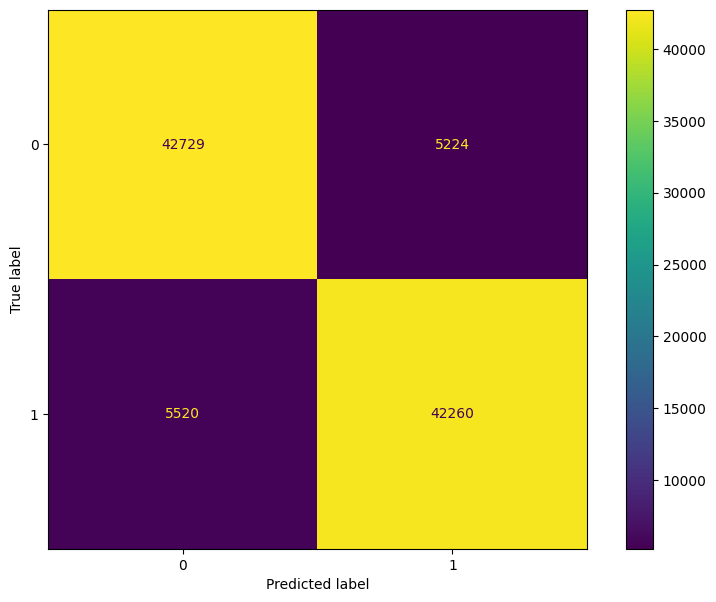

In [79]:
# the confusion matrix (the best model from gridcv)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

## KNN (with HP Tuning)

In [80]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [81]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (10,20,50,100,500)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (10, 20, 50, 100, 500)},
             scoring='recall')

In [82]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 10},0.819638,3
1,{'n_neighbors': 20},0.827645,1
2,{'n_neighbors': 50},0.822268,2
3,{'n_neighbors': 100},0.813053,4
4,{'n_neighbors': 500},0.791868,5


In [83]:
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     47953
           1       0.88      0.83      0.85     47780

    accuracy                           0.86     95733
   macro avg       0.86      0.86      0.86     95733
weighted avg       0.86      0.86      0.86     95733



## Bernoulli Naive Bayes (With HP Tuning)

In [84]:
from sklearn.naive_bayes import BernoulliNB

bnb_clf = BernoulliNB()

In [85]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'alpha': (0.1,0.3,0.5,1,2,3,4,5,6,7,8,9),
    'binarize': (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
}

bnb_clf_randomcv = RandomizedSearchCV(bnb_clf, parameters)
bnb_clf_randomcv.fit(x_train, y_train)

RandomizedSearchCV(estimator=BernoulliNB(),
                   param_distributions={'alpha': (0.1, 0.3, 0.5, 1, 2, 3, 4, 5,
                                                  6, 7, 8, 9),
                                        'binarize': (0.0, 0.1, 0.2, 0.3, 0.4,
                                                     0.5, 0.6, 0.7, 0.8, 0.9,
                                                     1)})

In [86]:
# results of RandomSearchCV
bnb_result = pd.DataFrame(bnb_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
bnb_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
3,"{'binarize': 0.4, 'alpha': 9}",0.683432,1
4,"{'binarize': 0.4, 'alpha': 0.3}",0.683432,1
1,"{'binarize': 0.2, 'alpha': 1}",0.682134,3
8,"{'binarize': 0.2, 'alpha': 8}",0.682134,3
7,"{'binarize': 0.0, 'alpha': 3}",0.669975,5
2,"{'binarize': 0.8, 'alpha': 6}",0.664648,6
0,"{'binarize': 0.8, 'alpha': 4}",0.664643,7
9,"{'binarize': 0.6, 'alpha': 1}",0.664263,8
5,"{'binarize': 0.5, 'alpha': 7}",0.664209,9
6,"{'binarize': 1, 'alpha': 7}",0.611818,10


In [87]:
# classification report
from sklearn.metrics import classification_report
y_pred = bnb_clf_randomcv.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67     47953
           1       0.67      0.74      0.70     47780

    accuracy                           0.68     95733
   macro avg       0.69      0.68      0.68     95733
weighted avg       0.69      0.68      0.68     95733

